In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('clean_jobs_data_1.csv')
df.head(2)

,company_name,job_title,location,state,est_salary,min_salary,max_salary,python,spark,excel,aws,rating,sector,industry,job_age,company_age,job_description
0,Spotify,"Data Scientist, Spotify Advertising","New York, NY",NY,78000-182000,78000.0,182000.0,0,0,0,0,4.2,Information Technology,Internet & Web Services,30.0,16.0,"Data, Research & Insights\nData Science\nAt Sp..."
1,NTT DATA,Data Scientist,"Woonsocket, RI",RI,70,145600.0,145600.0,0,0,0,0,3.8,Information Technology,Information Technology Support Services,1.0,55.0,NTT Data is assisting our healthcare client se...


In [9]:
df.columns

Index(['company_name', 'job_title', 'location', 'state', 'est_salary',
       'min_salary', 'max_salary', 'python', 'spark', 'excel', 'aws', 'rating',
       'sector', 'industry', 'job_age', 'company_age', 'job_description'],
      dtype='object')

In [10]:
def simplify_job_title(job_title):
    if 'data science' in job_title.lower() or 'data scientist' in job_title.lower():
        return 'data science'
    elif 'machine learning' in job_title.lower():
        return 'ml'
    elif 'analyst' in job_title.lower():
        return 'analyst'
    elif 'data engineer' in job_title.lower():
        return 'data engineer'
    elif 'manager' in job_title.lower():
        return 'manager'
    elif 'director' in job_title.lower():
        return 'director'
    else:
        return 'na'

def seniority(job_title):
    for sen_sen in ['senior', 'sr', 'sr.']:
        if sen_sen in job_title.lower():
            return 'senior'
    for sen_jr in ['junior', 'jr', 'jr.']:
        if sen_jr in job_title.lower():
            return 'junior'
    return 'na'

In [7]:
df.job_title.value_counts()

data science     940
na                31
data engineer     28
analyst            1
Name: job_title, dtype: int64

In [12]:
df['simp_job_title'] = df.job_title.apply(lambda x: simplify_job_title(x))
df['seniority'] = df.job_title.apply(lambda x: seniority(x))
df['job_description'] = df.job_description.apply(lambda x: x.lower())
df['avg_salary'] = (df['min_salary'] + df['max_salary']) / 2

In [13]:
df.seniority.value_counts()

na        885
senior     67
junior     48
Name: seniority, dtype: int64

In [14]:
df.simp_job_title.value_counts()

data science     940
na                31
data engineer     28
analyst            1
Name: simp_job_title, dtype: int64

In [24]:
df['desc_length'] = df.job_description.apply(lambda x: len(x))

In [25]:
df.describe()

,min_salary,max_salary,python,spark,excel,aws,rating,job_age,company_age,avg_salary,desc_length
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,975.000000,1000.00000,1000.000000,1000.000000
mean,95197.878880,136228.880000,0.106000,0.063000,0.041000,0.033000,3.029800,16.556923,23.69400,115713.379440,1058.533000
std,30489.520434,56331.778001,0.307992,0.243085,0.198389,0.178726,1.906239,11.990182,41.66798,36299.799228,507.514873
min,30000.000000,2080.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,-1.00000,48638.940000,14.000000
25%,75000.000000,116000.000000,0.000000,0.000000,0.000000,0.000000,2.900000,4.500000,-1.00000,91000.000000,796.000000
50%,90000.000000,135200.000000,0.000000,0.000000,0.000000,0.000000,3.900000,14.000000,4.00000,120000.000000,953.000000
75%,117000.000000,168750.000000,0.000000,0.000000,0.000000,0.000000,4.200000,30.000000,23.00000,135000.000000,1305.000000
max,191000.000000,276000.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,220.00000,233500.000000,5748.000000


In [26]:
num_cols = list(df.select_dtypes(include=np.number).columns)
for i in ['aws', 'python', 'spark', 'excel']:
    num_cols.remove(i)

In [27]:
num_cols

['min_salary',
 'max_salary',
 'rating',
 'job_age',
 'company_age',
 'avg_salary',
 'desc_length']

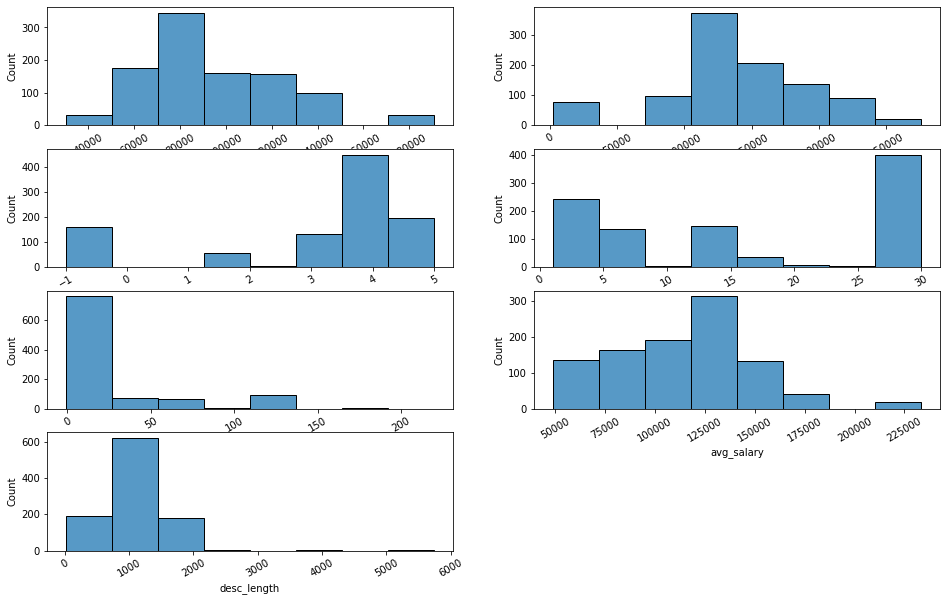

In [29]:
plt.figure(figsize=(16, 10))
for pos, col in enumerate(num_cols):
    plt.subplot(4, 2, pos+1)
    sns.histplot(df[col], bins=8)
    plt.xticks(rotation=30)

<AxesSubplot:>

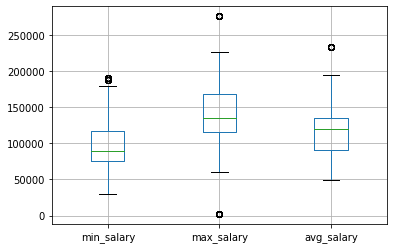

In [22]:
df.boxplot(column=['min_salary', 'max_salary', 'avg_salary'])

<AxesSubplot:>

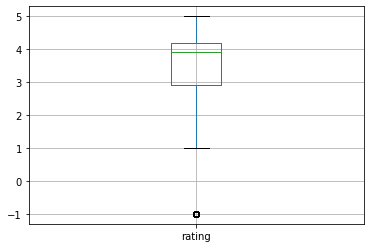

In [23]:
df.boxplot(column=['rating'])

In [41]:
df[['company_age', 'avg_salary', 'rating', 'desc_length', 'min_salary', 'max_salary']].corr()

,company_age,avg_salary,rating,desc_length,min_salary,max_salary
company_age,1.000000,-0.043118,0.288010,0.032509,-0.154533,0.028071
avg_salary,-0.043118,1.000000,0.427029,0.085902,0.683760,0.918701
rating,0.288010,0.427029,1.000000,-0.052168,0.006130,0.547032
desc_length,0.032509,0.085902,-0.052168,1.000000,-0.069500,0.148326
min_salary,-0.154533,0.683760,0.006130,-0.069500,1.000000,0.339971
max_salary,0.028071,0.918701,0.547032,0.148326,0.339971,1.000000


<AxesSubplot:>

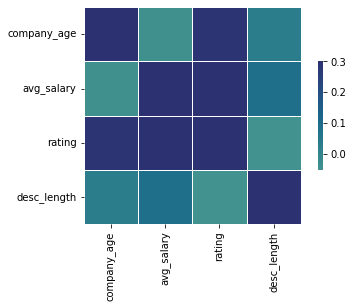

In [42]:
sns.heatmap(df[['company_age', 'avg_salary', 'rating', 'desc_length']].corr(), vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink':.5}, cmap='crest', cbar=True)

In [39]:
non_numeric = df.select_dtypes(exclude=np.number)
non_numeric.columns

Index(['company_name', 'job_title', 'location', 'state', 'est_salary',
       'sector', 'industry', 'job_description', 'simp_job_title', 'seniority'],
      dtype='object')

In [43]:
non_numeric.drop(columns=['company_name', 'job_title', 'location', 'est_salary', 'job_description'], inplace=True)
non_numeric.head(3)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,state,sector,industry,simp_job_title,seniority
0,NY,Information Technology,Internet & Web Services,data science,na
1,RI,Information Technology,Information Technology Support Services,data science,na
2,TX,Manufacturing,Food & Beverage Manufacturing,data science,na


In [56]:
non_numeric['sector'].value_counts()

-1.0                                  262
Information Technology                256
Manufacturing                          93
Financial Services                     86
Pharmaceutical & Biotechnology         85
Management & Consulting                54
Government & Public Administration     35
Retail & Wholesale                     34
Transportation & Logistics             30
Arts, Entertainment & Recreation       30
Healthcare                             16
Human Resources & Staffing              5
Insurance                               3
Education                               2
Hotels & Travel Accommodation           2
Media & Communication                   2
Energy, Mining & Utilities              2
Restaurants & Food Service              1
Real Estate                             1
Telecommunications                      1
Name: sector, dtype: int64